# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [49]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install seaborn[stats]

Note: you may need to restart the kernel to use updated packages.


In [51]:
import seaborn as sns

In [52]:
from ISLP import load_data
Boston = load_data("Boston")

In [53]:
print (Boston)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

In [54]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [55]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))
    medv = median value of owner-occupied homes in $1000s
    dis = weighted mean of distances to five Boston employment centres

_(ii)_ What concept ‘defines’ the plotted line? 
    equation

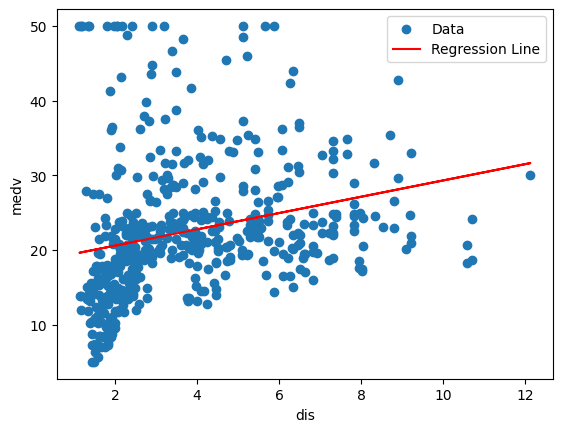

In [56]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?
    null hypothesis is that there is no relationship between median value of owner-occupied homes and weighted distance to five Boston employment centers
    Alternative Hypothesis is that the closer weighter distance to five Boston employment cetners, the median value of owner-occupied homes are higher

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [57]:
#predictor variable addition as constant
dis_with_const = sm.add_constant(dis)

#OLS model creation
model = sm.OLS(medv, dis_with_const)

#fit a simple regression model
results = model.fit()

print (dis_with_const)

[[1.     4.09  ]
 [1.     4.9671]
 [1.     4.9671]
 ...
 [1.     2.1675]
 [1.     2.3889]
 [1.     2.505 ]]


Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  



_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
    #$B_0$ (intercept) is 18.3901 and $B_1$ (slope) is 1.0916
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
    #$B_0$ = 0.817 and $B_1$0.188
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  
    #[[16.78417945 19.99599722]
     #[ 0.72150933  1.4617167]]


In [59]:

# Summary of the regression results
summarize(results)

c:\Users\mejak\AppData\Local\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
const,18.3901,0.817,22.499,0.0
x1,1.0916,0.188,5.795,0.0


In [60]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        16:40:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
x1             1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Get confidence intervals for coefficients
conf_intervals = results.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

Confidence Intervals for Coefficients:
[[16.78417945 19.99599722]
 [ 0.72150933  1.4617167 ]]



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

R2 value is 0.062 which low value, however, it can't be generalized to indicate that model is not a good fit
yes, reject null hypothesis. P value is 0 and indicates that the model as a whole has a better fit than model with no predictors

In [68]:
# Your answer here
print(results.summary())
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        18:04:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [72]:
# Add your code here

# Extract predictor variables and add constant
X1 = Boston['dis']
X2 = Boston['rm']
X = sm.add_constant(pd.DataFrame({'dis': X1, 'rm': X2}))

# Extract response variable
Y = Boston['medv']

# Create the OLS model
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()


_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        18:25:19   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

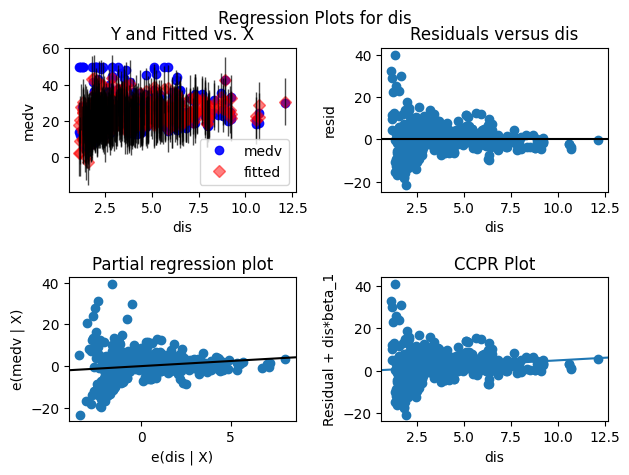

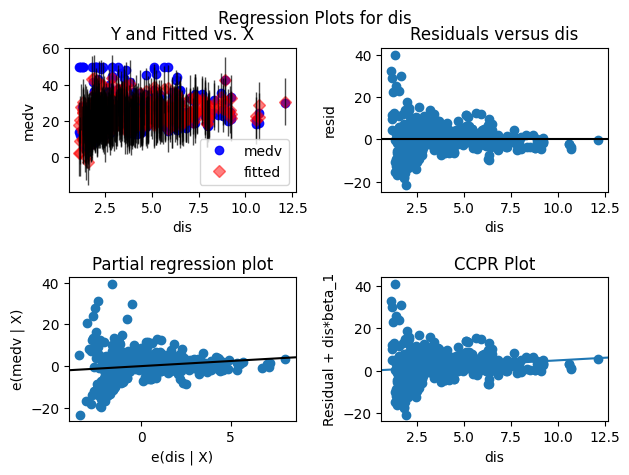

In [76]:
# Add your code here

#null hypothesis - there is no relationship between weighted mean of distances to five Boston employment centres and average number of rooms per dwelling has no relationship with median value of owner-occupied homes in $1000s
#alternative hypotheses is there is relationship between weighted mean of distances to five Boston employment centres and average number of rooms per dwelling has no relationship with median value of owner-occupied homes in $1000s
print(results.summary())
#yes, it appears that dis and rm are predictive of decrease in medv based on coef value.
sm.graphics.plot_regress_exog(results, exog_idx='dis')
#distance above 10 are outliers. outliers may mean that model is not adequately capturing the relationship between dis and rm. It can influence predictors


_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [79]:
# Add your code here
Boston['dis_rm_interaction'] = X1 * X2

# Add constant and predictors
X = sm.add_constant(Boston[['dis', 'rm', 'dis_rm_interaction']])
Y = Boston['medv']

# Fitting the model
model_interaction = sm.OLS(Y, X)
results_interaction = model_interaction.fit()

# summary
print(results_interaction.summary())

# P value is 0 for dis_rm_interaction and may mean that there is an interaction between dis, rm and medv. with positive coefficient of dis_rm_interaction, impacts of dis, rm and medv is greater than individual impacts

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        18:39:37   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.2533      4

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
